In [38]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd
import statistics as s 

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
data = pd.read_csv (r'logistic_reg_data.csv')

### Posterior inference

In [3]:
model = CmdStanModel(stan_file='logistic_regression.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values
                 )
fit = model.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:03 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:03 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:04 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:04 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:05 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |█████▉    | 00:05 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:06 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:06 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 


INFO:cmdstanpy:CmdStan done processing.


In [5]:
df = fit.draws_pd()
df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta[1],beta[2],beta[3],...,prob_ppc[491],prob_ppc[492],prob_ppc[493],prob_ppc[494],prob_ppc[495],prob_ppc[496],prob_ppc[497],prob_ppc[498],prob_ppc[499],prob_ppc[500]
0,-338.090,0.927271,0.09655,5.0,31.0,0.0,343.799,-0.000063,0.481247,-0.655559,...,0.602965,0.573857,0.603185,0.318779,0.549084,0.320229,0.426176,0.464356,0.562588,0.337859
1,-337.858,0.959189,0.09655,6.0,63.0,0.0,339.511,-0.000285,0.880819,-0.321850,...,0.583231,0.515976,0.584979,0.222531,0.480158,0.224144,0.343873,0.351077,0.549139,0.244408
2,-340.441,0.836728,0.09655,4.0,31.0,0.0,344.477,-0.001669,0.464368,0.089349,...,0.454990,0.414604,0.455765,0.231534,0.397450,0.232438,0.325378,0.352070,0.455534,0.248788
3,-339.600,0.999785,0.09655,5.0,31.0,0.0,341.092,0.000382,0.472379,-0.620346,...,0.589761,0.561226,0.590091,0.225239,0.536891,0.227608,0.387967,0.337800,0.520407,0.254913
4,-340.968,0.941441,0.09655,5.0,47.0,0.0,342.564,-0.000123,1.031020,-1.141800,...,0.651684,0.589464,0.652208,0.204094,0.540705,0.205693,0.339157,0.285726,0.546381,0.225692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-338.527,0.754645,0.10801,6.0,63.0,0.0,342.027,-0.000144,0.305431,-0.996161,...,0.589054,0.578871,0.588177,0.271708,0.556122,0.273418,0.406919,0.443986,0.525307,0.294714
3996,-339.657,0.977624,0.10801,5.0,63.0,0.0,341.701,0.000254,0.149774,-0.506266,...,0.586222,0.579498,0.586221,0.229660,0.566552,0.232395,0.422172,0.513162,0.566819,0.264702
3997,-341.826,0.987219,0.10801,5.0,31.0,0.0,343.420,-0.000951,-0.204083,-0.538959,...,0.471454,0.495149,0.469574,0.245078,0.493825,0.246900,0.395212,0.398652,0.427485,0.272222
3998,-339.778,0.930653,0.10801,5.0,31.0,0.0,344.237,0.000144,0.125610,-0.029965,...,0.556456,0.545313,0.556958,0.226134,0.538409,0.229125,0.426612,0.402011,0.532544,0.264724


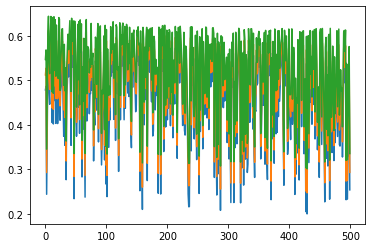

In [7]:
med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])
plt.plot(estimate_ppc_df)

## <span style='color:Yellow'> Task 2  </span>
1. Edit stan model and create models with different priors. Use original setting and some priors from task 1.
2. Fit the model
3. Plot the probability of individual outcome:
<ul>
<li>plot generated paramether theta (prob_pcc): mean with its error bars (plt.errorbar)</li>
<li>to plot its error bars take into consider its 25th, 50th and 75th percentile</li>
<li>also mark the real value of y, by different colored dots (for mean values)</li>
</ul>

In [6]:
model_1 = CmdStanModel(stan_file='logistic_regression_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [8]:
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values
                 )
fit = model_1.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:02 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:03 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:04 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:04 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:04 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:05 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |████      | 00:05 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:05 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:05 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:06 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 00:06 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:06 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎ 


INFO:cmdstanpy:CmdStan done processing.


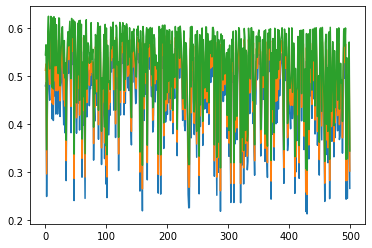

In [9]:
med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])
plt.plot(estimate_ppc_df)

Mean is : 0.463266128


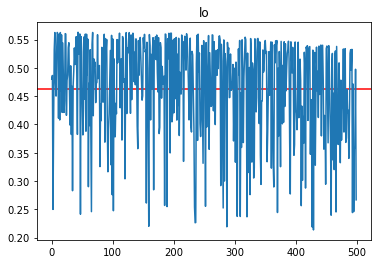

In [46]:
x = list(range(0,500))
y1 = estimate_ppc_df['lo'].to_numpy()
y2 = estimate_ppc_df['med'].to_numpy()
y3 = estimate_ppc_df['hi'].to_numpy()

mean1 = s.mean(y1)
mean2 = s.mean(y2)
mean3 = s.mean(y3)

plt.errorbar(x, y1)
plt.axhline(mean1, color='r')
plt.title('lo')
print('Mean is :', mean1)

Mean is : 0.492000771


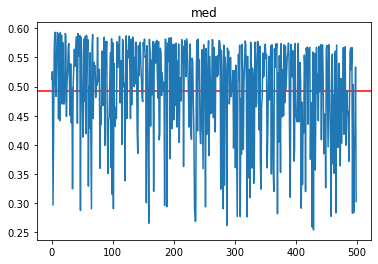

In [45]:
plt.errorbar(x, y2)
plt.axhline(mean2, color='r')
plt.title('med')
print('Mean is :', mean2)

Mean is : 0.5214024765


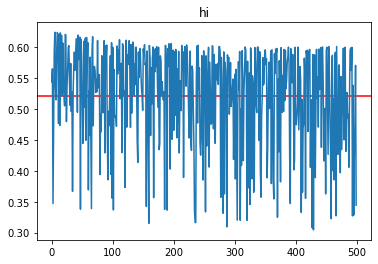

In [44]:
plt.errorbar(x, y3)
plt.axhline(mean3, color='r')
plt.title('hi')
print('Mean is :', mean3)